# Feature Engineering

##### todos defined in previous notebook "1st EDA"

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fp = pd.read_csv("data/fp_data_v2.csv", index_col=0)
df_gk = pd.read_csv("data/gk_data_v2.csv", index_col=0)
pd.set_option('display.max_columns', None)

## Nationality and continent

In [5]:
# 1. Nationality and National team country
translations = pd.read_csv("data/countries_translations_ger_eng.csv")
translations_dict = pd.Series(translations.tm_english.values,index=translations.tm_deutsch).to_dict()
translations_dict


{'Algerien': 'Algeria',
 'Angola': 'Angola',
 'Benin': 'Benin',
 'Burkina Faso': 'Burkina Faso',
 'Burundi': 'Burundi',
 'Kamerun': 'Cameroon',
 'Kap Verde': 'Cape Verde',
 'Komoren': 'Comoros',
 'Ägypten': 'Egypt',
 'Eritrea': 'Eritrea',
 'Gabun': 'Gabon',
 'Ghana': 'Ghana',
 'Guinea': 'Guinea',
 'Kenia': 'Kenya',
 'Liberia': 'Liberia',
 'Libyen': 'Libya',
 'Madagaskar': 'Madagascar',
 'Malawi': 'Malawi',
 'Mali': 'Mali',
 'Mauretanien': 'Mauritania',
 'Marokko': 'Morocco',
 'Mosambik': 'Mozambique',
 'Namibia': 'Namibia',
 'Niger': 'Niger',
 'Nigeria': 'Nigeria',
 'Ruanda': 'Rwanda',
 'Senegal': 'Senegal',
 'Sierra Leone': 'Sierra Leone',
 'Südafrika': 'South Africa',
 'Südsudan': 'South Sudan',
 'Togo': 'Togo',
 'Tunesien': 'Tunisia',
 'Uganda': 'Uganda',
 'Sambia': 'Zambia',
 'Simbabwe': 'Zimbabwe',
 'Äquatorialguinea': 'Equatorial Guinea',
 'Afghanistan': 'Afghanistan',
 'Armenien': 'Armenia',
 'Aserbaidschan': 'Azerbaijan',
 'Bahrain': 'Bahrain',
 'China': 'China PR',
 'Georgien'

In [6]:
df_fp["national_team_country"] = df_fp["national_team_country"].replace(translations_dict)
df_gk["national_team_country"] = df_gk["national_team_country"].replace(translations_dict)

df_fp.head(3)

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,main_position,all_positions,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,Rechtsaußen,"RW, CF, ST",FC Barcelona,LaLiga,1,1,Argentina,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Linksaußen,"ST, LW",Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,5,High/Low,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,Linksaußen,"LW, CAM",FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,5,92,92,Right,5,5,High/Medium,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61


In [7]:
country_continents1 = pd.read_csv("data/countries_continent.csv")
country_continents1 = country_continents1.rename(columns={"country": "nationality"})

df_fp = pd.merge(df_fp,country_continents1,on='nationality')
df_gk = pd.merge(df_gk,country_continents1,on='nationality')

df_fp.head(3)

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,main_position,all_positions,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,geographical_continent
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,Rechtsaußen,"RW, CF, ST",FC Barcelona,LaLiga,1,1,Argentina,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,South America
1,52000000.0,Sergio Agüero,Sergio Leonel Agüero del Castillo,1988,32,173,70,Argentina,Mittelstürmer,ST,Manchester City,Premier League,1,1,Argentina,1,0,97,4,89,89,Right,4,4,High/Medium,80,90,77,88,33,74,"Avoids Using Weaker Foot, Outside Foot Shot",70,93,78,83,85,88,83,73,64,89,82,78,84,92,91,89,81,79,74,84,65,24,93,83,83,90,30,29,24,87,87,87,85,87,87,87,85,85,85,85,83,77,77,77,83,60,58,58,58,60,56,50,50,50,56,South America
2,72000000.0,Paulo Dybala,Paulo Bruno Exequiel Dybala,1993,26,177,75,Argentina,Hängende Spitze,"CAM, RW",Juventus Turin,Serie A,1,1,Argentina,1,0,29,3,88,92,Left,3,4,Medium/Medium,83,82,84,90,43,64,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",82,80,64,87,88,90,88,88,75,93,86,81,91,84,85,80,75,79,61,86,48,42,80,87,86,84,32,48,40,80,80,80,85,85,85,85,85,86,86,86,85,80,80,80,85,68,64,64,64,68,64,54,54,54,64,South America


In [8]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()    
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

df_fp = movecol(df_fp, cols_to_move=["geographical_continent"], ref_col="nationality", place="After")
df_gk = movecol(df_gk, cols_to_move=["geographical_continent"], ref_col="nationality", place="After")

df_fp = df_fp.sort_values(by='overall', ascending=False)
df_gk = df_gk.sort_values(by='overall', ascending=False)
df_fp = df_fp.reset_index(drop=True)
df_gk = df_gk.reset_index(drop=True)

df_fp.head(3)

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,all_positions,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Rechtsaußen,"RW, CF, ST",FC Barcelona,LaLiga,1,1,Argentina,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Linksaußen,"ST, LW",Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,5,High/Low,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Linksaußen,"LW, CAM",FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,5,92,92,Right,5,5,High/Medium,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61


## Positions

only applies for fieldplayers, since goalkeepers only have one position

In [9]:
df_fp["main_position"].value_counts()

Innenverteidiger         2176
Mittelstürmer            1565
Zentrales Mittelfeld     1392
Defensives Mittelfeld    1067
Rechter Verteidiger       992
Linker Verteidiger        953
Offensives Mittelfeld     744
Linksaußen                744
Rechtsaußen               719
Linkes Mittelfeld         243
Rechtes Mittelfeld        208
Hängende Spitze           109
Mittelfeld                 35
Sturm                      19
Abwehr                     13
Name: main_position, dtype: int64

In [10]:
# adjust german positions to english/fifa notation
positions_tm_in_fifa = pd.read_csv("data/tm_mainpos_to_fifa_pos.csv")
positions_tm_in_fifa_dict = pd.Series(positions_tm_in_fifa.fifa.values,index=positions_tm_in_fifa.tm).to_dict()

df_fp["main_position"] = df_fp["main_position"].replace(positions_tm_in_fifa_dict)

df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,all_positions,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,"RW, CF, ST",FC Barcelona,LaLiga,1,1,Argentina,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,"ST, LW",Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,5,High/Low,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,"LW, CAM",FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,5,92,92,Right,5,5,High/Medium,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,"CAM, CM",Manchester City,Premier League,1,1,Belgium,1,0,74,4,91,91,Right,5,4,High/High,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,"LW, CF",Real Madrid,LaLiga,1,1,Belgium,1,0,106,4,91,91,Right,4,4,High/Medium,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61


In [11]:
df_fp["all_positions"] = df_fp.all_positions.map(lambda x: [i.strip() for i in x.split(",")])
df_fp["positional_flexibility"] = df_fp["all_positions"].str.len()
df_fp["positional_flexibility"] = df_fp["positional_flexibility"].astype("object")

df_fp["positional_flexibility"] = df_fp["positional_flexibility"].replace(1, "Low")
df_fp["positional_flexibility"] = df_fp["positional_flexibility"].replace(2, "Medium") 
df_fp["positional_flexibility"] = df_fp["positional_flexibility"].replace(3, "High") 

df_fp = df_fp.drop(["all_positions"],axis=1)

df_fp = movecol(df_fp, cols_to_move=["positional_flexibility"], ref_col="main_position", place="After")

df_fp.head(10)

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,1,Argentina,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,5,High/Low,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,5,92,92,Right,5,5,High/Medium,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,1,Belgium,1,0,74,4,91,91,Right,5,4,High/High,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,1,Belgium,1,0,106,4,91,91,Right,4,4,High/Medium,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61
5,80000000.0,Virgil van Dijk,Virgil van Dijk,1991,28,193,92,Netherlands,Europe,Centre Back,Low,FC Liverpool,Premier League,1,1,Netherlands,1,0,33,3,90,91,Right,3,2,Medium/Medium,77,60,70,71,90,86,"Diver, Avoids Using Weaker Foot, Leadership, L...",53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,69,69,69,67,69,69,69,67,69,69,69,69,74,74,74,69,79,83,83,83,79,81,87,87,87,81
6,120000000.0,Mohamed Salah,Mohamed Salah Ghaly,1992,27,175,71,Egypt,Africa,Right Forward,Medium,FC Liverpool,Premier League,1,1,Egypt,1,0,67,3,90,90,Left,3,4,High/Medium,93,86,81,89,45,74,"Beat Offside Trap, Argues with Officials, Earl...",79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,84,84,84,88,88,88,88,88,87,87,87,87,81,81,81,87,70,67,67,67,70,66,57,57,5

## Average over positional values

| Position abbreviations | Position | Main role on the pitch |
| --- | --- | --- |
| ls | Left Striker | Attack |
| st | Striker | Attack |
| rs | Right Striker | Attack |
| lw | Left Winger | Attack |
| lf | Left Forward | Attack |
| cf | Central Forward | Attack |
| rf | Right Forward | Attack |
| rw | Right Winger | Attack |
| lam | Left Attacking Midfielder | Midfield Attack |
| cam | Central Attacking Midfielder | Midfield Attack |
| ram | Right Attacking Midfielder | Midfield Attack |
| lm | Left Midfielder | Midfield Attack |
| rm | Right Midfielder | Midfield Attack |
| lcm | Left Central Midfielder | Midfield Defense |
| cm | Central Midfielder | Midfield Defense |
| rcm | Right Central Midfielder | Midfield Defense |
| ldm | Left Defending Midfielder | Midfield Defense |
| cdm | Central Defending Midfielder | Midfield Defense |
| rdm | Right Defending Midfielder | Midfield Defense |
| lwb | Left Wingback | Defense |
| rwb | Right Wingback | Defense |
| lb | Left back | Defense |
| lcb | Left Centre Back | Defense |
| cb | Centre Back | Defense |
| rcb | Right Centre Back | Defense |
| rb | Right Back | Defense |

In [12]:
# build new order of positional values


df_fp = movecol(df_fp, cols_to_move=["lam","cam","ram","lm","rm"], ref_col="rw", place="After")
df_fp = movecol(df_fp, cols_to_move=["lcm","cm","rcm","ldm","lm","cdm","rdm"], ref_col="rm", place="After")
df_fp = movecol(df_fp, cols_to_move=["lwb","rwb","lb","lcb","cb","rcb","rb"], ref_col="rdm", place="After")


# 
df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,rm,lcm,cm,rcm,ldm,lm,cdm,rdm,lwb,rwb,lb,lcb,cb,rcb,rb
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,1,Argentina,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,66,92,66,66,68,68,63,52,52,52,63
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,5,High/Low,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,61,88,61,61,65,65,61,53,53,53,61
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,5,92,92,Right,5,5,High/Medium,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,61,89,61,61,66,66,61,46,46,46,61
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,1,Belgium,1,0,74,4,91,91,Right,5,4,High/High,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,77,88,77,77,77,77,73,66,66,66,73
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,1,Belgium,1,0,106,4,91,91,Right,4,4,High/Medium,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,63,89,63,63,66,66,61,49,49,49,61


In [13]:
df_fp["attack_positions_avg_score"] = df_fp.loc[: , "ls":"rw"].mean(axis=1).astype("int64")
df_fp["midfield_attack_positions_avg_score"] = df_fp.loc[: , "lam":"rm"].mean(axis=1).astype("int64")
df_fp["idfield_defense_positions_avg_score"] = df_fp.loc[: , "lcm":"rdm"].mean(axis=1).astype("int64")
df_fp["defense_positions_avg_score"] = df_fp.loc[: , "lwb":"rb"].mean(axis=1).astype("int64")

df_fp = df_fp.drop(df_fp.loc[:, "ls":"rb"], axis = 1)

df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,attack_positions_avg_score,midfield_attack_positions_avg_score,idfield_defense_positions_avg_score,defense_positions_avg_score
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,1,Argentina,1,0,138,5,94,94,Left,4,4,Medium/Low,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,91,92,78,59
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,5,High/Low,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,90,88,73,58
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,5,92,92,Right,5,5,High/Medium,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,87,89,74,56
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,1,Belgium,1,0,74,4,91,91,Right,5,4,High/High,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,85,88,82,71
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,1,Belgium,1,0,106,4,91,91,Right,4,4,High/Medium,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,86,89,75,57


## Workrate, Int. Reputation, Skill Moves, Weak foot

##### work_rate

"Also known as Player Work Rate. Player Work Rate is the rate of a player's behavior on the pitch in terms of attacking and defensive works. The Work Rate is defined for Attacking (Attacking Work Rate - Abbreviated as AWR) and Defensive (Defensive Work Rate - Abbreviated as DWR) and rated between low, medium and high, which defines how a player puts effort to participates in attacks and defenses even when they are out of position." <br>
https://www.fifplay.com/encyclopedia/work-rate/

In [14]:
df_fp["attacking_work_rate"] = df_fp["work_rate"].str.split("/").str[0]
df_fp["defensive_work_rate"] = df_fp["work_rate"].str.split("/").str[1]

df_fp = movecol(df_fp, cols_to_move=["attacking_work_rate","defensive_work_rate"], ref_col="weak_foot", place="After")

df_fp = df_fp.drop(["work_rate"],axis=1)

df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,international_reputation,overall,potential,preferred_foot,weak_foot,attacking_work_rate,defensive_work_rate,skill_moves,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,attack_positions_avg_score,midfield_attack_positions_avg_score,idfield_defense_positions_avg_score,defense_positions_avg_score
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,1,Argentina,1,0,138,5,94,94,Left,4,Medium,Low,4,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,91,92,78,59
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,1,Portugal,1,0,164,5,93,93,Right,4,High,Low,5,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,90,88,73,58
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,5,92,92,Right,5,High,Medium,5,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,87,89,74,56
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,1,Belgium,1,0,74,4,91,91,Right,5,High,High,4,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,85,88,82,71
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,1,Belgium,1,0,106,4,91,91,Right,4,High,Medium,4,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,86,89,75,57


##### international reputation

"As you can see above, the rating is calculated by the sum of the weighted average of attributes with international reputation. But after all, what is this second parcel? International Reputation, also known as International Recognition, is an attribute that affects the player’s rating according to his club’s local and international prestige. It is based essentially on the popularity, history and results of them both. Basically, IR was created in order to adjust the players’ rating relatively to everything that doesn’t actually have to do with his technical, physical and mental capacities. It converges artificially so that the players who have the most fans around the world always get the highest ratings, but in practice there is no real effect." <br>
https://www.fifauteam.com/fifa-18-player-ratings-guide-ultimate-team/

--> apparently it is a somewhat cosmetic estimation of the popularity of the player. This can be useful for the "superstars" investigation, but not beneficial for now, so let's drop this

In [15]:
df_fp = df_fp.drop(["international_reputation"],axis=1)
df_gk = df_gk.drop(["international_reputation"],axis=1)

##### skill_moves

"The Star Skill Moves measures the ability that a player has to perform technical moves. To all skill moves, it is assigned a number between 1 (least complex) and 5 (most complex).
Players with higher skills are able to perform more complex moves." <br>
https://www.fifauteam.com/fifa-20-skill-moves-guide/

In [16]:
df_fp["skill_moves"] = df_fp["skill_moves"].replace(1, "1 Star Moves")
df_fp["skill_moves"] = df_fp["skill_moves"].replace(2, "2 Star Moves") 
df_fp["skill_moves"] = df_fp["skill_moves"].replace(3, "3 Star Moves") 
df_fp["skill_moves"] = df_fp["skill_moves"].replace(4, "4 Star Moves")
df_fp["skill_moves"] = df_fp["skill_moves"].replace(5, "5 Star Moves")

# goalkeepers only have 1 star skill_moves
df_gk = df_gk.drop(["skill_moves"],axis=1)

df_fp.head()


,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,overall,potential,preferred_foot,weak_foot,attacking_work_rate,defensive_work_rate,skill_moves,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,attack_positions_avg_score,midfield_attack_positions_avg_score,idfield_defense_positions_avg_score,defense_positions_avg_score
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,1,Argentina,1,0,138,94,94,Left,4,Medium,Low,4 Star Moves,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,91,92,78,59
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,1,Portugal,1,0,164,93,93,Right,4,High,Low,5 Star Moves,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,90,88,73,58
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,92,92,Right,5,High,Medium,5 Star Moves,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,87,89,74,56
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,1,Belgium,1,0,74,91,91,Right,5,High,High,4 Star Moves,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,85,88,82,71
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,1,Belgium,1,0,106,91,91,Right,4,High,Medium,4 Star Moves,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,86,89,75,57


##### weak_foot

" A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the shot power and ball control for the other foot of that player than his preferred foot's.
For example, if a FIFA player's preferred foot is Right, his Weak Foot will be Left, and when his Weak Foot is rated as 3/5 (3-star), it means his left foot's shot power and ball controls are slightly above the average." <br> 
https://www.fifplay.com/encyclopedia/weak-foot/

In [17]:
df_fp["weak_foot"] = df_fp["weak_foot"].replace(1, "1 Star")
df_fp["weak_foot"] = df_fp["weak_foot"].replace(2, "2 Stars") 
df_fp["weak_foot"] = df_fp["weak_foot"].replace(3, "3 Stars") 
df_fp["weak_foot"] = df_fp["weak_foot"].replace(4, "4 Stars")
df_fp["weak_foot"] = df_fp["weak_foot"].replace(5, "5 Stars")

df_gk["weak_foot"] = df_gk["weak_foot"].replace(1, "1 Star")
df_gk["weak_foot"] = df_gk["weak_foot"].replace(2, "2 Stars") 
df_gk["weak_foot"] = df_gk["weak_foot"].replace(3, "3 Stars") 
df_gk["weak_foot"] = df_gk["weak_foot"].replace(4, "4 Stars")
df_gk["weak_foot"] = df_gk["weak_foot"].replace(5, "5 Stars")

df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,overall,potential,preferred_foot,weak_foot,attacking_work_rate,defensive_work_rate,skill_moves,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,attack_positions_avg_score,midfield_attack_positions_avg_score,idfield_defense_positions_avg_score,defense_positions_avg_score
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,1,Argentina,1,0,138,94,94,Left,4 Stars,Medium,Low,4 Star Moves,87,92,92,96,39,66,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,91,92,78,59
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,1,Portugal,1,0,164,93,93,Right,4 Stars,High,Low,5 Star Moves,90,93,82,89,35,78,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,90,88,73,58
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,92,92,Right,5 Stars,High,Medium,5 Star Moves,91,85,87,95,32,58,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,87,89,74,56
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,1,Belgium,1,0,74,91,91,Right,5 Stars,High,High,4 Star Moves,76,86,92,86,61,78,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,85,88,82,71
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,1,Belgium,1,0,106,91,91,Right,4 Stars,High,Medium,4 Star Moves,91,83,86,94,35,66,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,86,89,75,57


In [18]:
df_gk.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,overall,potential,preferred_foot,weak_foot,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_short_passing,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,mentality_aggression,mentality_vision,mentality_composure,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,80000000.0,Jan Oblak,Jan Oblak,1993,26,188,87,Slovenia,Europe,Torwart,Atlético Madrid,LaLiga,1,1,Slovenia,1,0,28,91,93,Right,3 Stars,87,92,78,89,52,90,"Flair, Acrobatic Clearance",43,40,30,43,60,67,88,49,59,78,41,78,34,65,68,87,92,78,90,89
1,72000000.0,Marc-André ter Stegen,Marc-André ter Stegen,1992,28,187,85,Germany,Europe,Torwart,FC Barcelona,LaLiga,1,1,Germany,1,0,24,90,93,Right,4 Stars,88,85,88,90,45,88,"Swerve Pass, Acrobatic Clearance, Flair Passes",61,63,30,38,50,37,86,43,66,79,35,78,43,70,70,88,85,88,88,90
2,72000000.0,Alisson,Alisson Ramses Becker,1992,28,191,91,Brazil,South America,Torwart,FC Liverpool,Premier League,1,1,Brazil,0,1,44,89,91,Right,3 Stars,85,84,85,89,51,90,"Flair, Swerve Pass",45,44,30,56,47,40,88,37,64,52,32,78,27,66,65,85,84,85,90,89
3,40000000.0,David de Gea,David De Gea Quintana,1990,29,192,82,Spain,Europe,Torwart,Manchester United,Premier League,1,1,Spain,1,0,41,89,90,Right,3 Stars,90,84,81,92,58,85,"Flair, Second Wind, Flair Passes",50,47,38,57,58,63,87,43,61,67,43,60,38,65,68,90,84,81,85,92
4,4800000.0,Samir Handanovic,Samir Handanovič,1984,35,193,92,Slovenia,Europe,Torwart,Inter Mailand,Serie A,1,1,Slovenia,0,1,81,88,88,Right,2 Stars,88,85,69,89,53,89,"Flair, Giant Throw-in",36,34,16,51,55,47,83,36,52,78,41,71,25,41,69,88,85,69,89,89


## Player traits

In [19]:
df_fp["player_traits"].isna().sum()

5800

In [20]:
df_fp["player_traits"] = df_fp["player_traits"].fillna("None")
df_fp["player_traits"] = df_fp["player_traits"].map(lambda x: [i.strip() for i in x.split(",")])
df_fp["traits_number"] = df_fp["player_traits"].str.len()
df_fp["traits_number"] = df_fp["traits_number"].astype("object")

df_gk["player_traits"] = df_gk["player_traits"].fillna("None")
df_gk["player_traits"] = df_gk["player_traits"].map(lambda x: [i.strip() for i in x.split(",")])
df_gk["traits_number"] = df_gk["player_traits"].str.len()
df_gk["traits_number"] = df_gk["traits_number"].astype("object")

df_fp.head(5)

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,overall,potential,preferred_foot,weak_foot,attacking_work_rate,defensive_work_rate,skill_moves,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,attack_positions_avg_score,midfield_attack_positions_avg_score,idfield_defense_positions_avg_score,defense_positions_avg_score,traits_number
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,1,Argentina,1,0,138,94,94,Left,4 Stars,Medium,Low,4 Star Moves,87,92,92,96,39,66,"[Beat Offside Trap, Argues with Officials, Ear...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,91,92,78,59,8
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,1,Portugal,1,0,164,93,93,Right,4 Stars,High,Low,5 Star Moves,90,93,82,89,35,78,"[Long Throw-in, Selfish, Argues with Officials...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,90,88,73,58,6
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,92,92,Right,5 Stars,High,Medium,5 Star Moves,91,85,87,95,32,58,"[Power Free-Kick, Injury Free, Selfish, Early ...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,87,89,74,56,6
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,1,Belgium,1,0,74,91,91,Right,5 Stars,High,High,4 Star Moves,76,86,92,86,61,78,"[Power Free-Kick, Avoids Using Weaker Foot, Di...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,85,88,82,71,6
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,1,Belgium,1,0,106,91,91,Right,4 Stars,High,Medium,4 Star Moves,91,83,86,94,35,66,"[Beat Offside Trap, Selfish, Finesse Shot, Spe...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,86,89,75,57,5


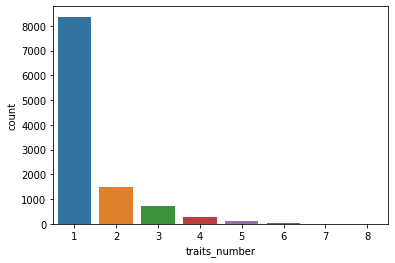

In [21]:
sns.countplot(x="traits_number",data = df_fp);

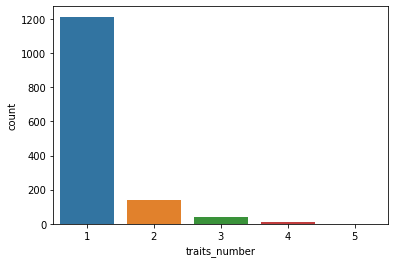

In [22]:
sns.countplot(x="traits_number",data = df_gk);

5800 players don't have traits and additional 3000+ (8000-5800) players only have 1 trait. Same relation for Goalkeepers. Traits can be interesting to investigate for superstars, but not for our general estimation, so let's drop it

In [23]:
df_fp = df_fp.drop(["player_traits","traits_number"],axis=1)
df_gk = df_gk.drop(["player_traits","traits_number"],axis=1)
df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,national_team_current_or_past,national_team_country,current_national_player,no_current_national_player,national_team_appearances,overall,potential,preferred_foot,weak_foot,attacking_work_rate,defensive_work_rate,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,attack_positions_avg_score,midfield_attack_positions_avg_score,idfield_defense_positions_avg_score,defense_positions_avg_score
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,1,Argentina,1,0,138,94,94,Left,4 Stars,Medium,Low,4 Star Moves,87,92,92,96,39,66,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,91,92,78,59
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,1,Portugal,1,0,164,93,93,Right,4 Stars,High,Low,5 Star Moves,90,93,82,89,35,78,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,90,88,73,58
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,1,Brazil,1,0,102,92,92,Right,5 Stars,High,Medium,5 Star Moves,91,85,87,95,32,58,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,87,89,74,56
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,1,Belgium,1,0,74,91,91,Right,5 Stars,High,High,4 Star Moves,76,86,92,86,61,78,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,85,88,82,71
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,1,Belgium,1,0,106,91,91,Right,4 Stars,High,Medium,4 Star Moves,91,83,86,94,35,66,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,86,89,75,57


## National player

In [24]:
df_fp["current_national_player"] = df_fp["current_national_player"].replace(1, "True")
df_fp["current_national_player"] = df_fp["current_national_player"].replace(0, "False")

df_fp = df_fp.drop(["national_team_current_or_past","national_team_country","no_current_national_player"],axis=1)


df_gk["current_national_player"] = df_gk["current_national_player"].replace(1, "True")
df_gk["current_national_player"] = df_gk["current_national_player"].replace(0, "False")

df_gk = df_gk.drop(["national_team_current_or_past","national_team_country","no_current_national_player"],axis=1)

df_fp.head()

,market_value_€,player_name,long_name,year_of_birth,player_age,height_cm,weight_kg,nationality,geographical_continent,main_position,positional_flexibility,club,league,divison,current_national_player,national_team_appearances,overall,potential,preferred_foot,weak_foot,attacking_work_rate,defensive_work_rate,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,attack_positions_avg_score,midfield_attack_positions_avg_score,idfield_defense_positions_avg_score,defense_positions_avg_score
0,112000000.0,Lionel Messi,Lionel Andrés Messi Cuccittini,1987,32,170,72,Argentina,South America,Right Forward,High,FC Barcelona,LaLiga,1,True,138,94,94,Left,4 Stars,Medium,Low,4 Star Moves,87,92,92,96,39,66,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,91,92,78,59
1,60000000.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985,35,187,83,Portugal,Europe,Left Forward,Medium,Juventus Turin,Serie A,1,True,164,93,93,Right,4 Stars,High,Low,5 Star Moves,90,93,82,89,35,78,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,90,88,73,58
2,128000000.0,Neymar,Neymar da Silva Santos Junior,1992,28,175,68,Brazil,South America,Left Forward,Medium,FC Paris Saint-Germain,Ligue 1,1,True,102,92,92,Right,5 Stars,High,Medium,5 Star Moves,91,85,87,95,32,58,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,87,89,74,56
3,120000000.0,Kevin De Bruyne,Kevin De Bruyne,1991,28,181,70,Belgium,Europe,Centre Attacking Midfield,Medium,Manchester City,Premier League,1,True,74,91,91,Right,5 Stars,High,High,4 Star Moves,76,86,92,86,61,78,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,85,88,82,71
4,80000000.0,Eden Hazard,Eden Hazard,1991,28,175,74,Belgium,Europe,Left Forward,Medium,Real Madrid,LaLiga,1,True,106,91,91,Right,4 Stars,High,Medium,4 Star Moves,91,83,86,94,35,66,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,86,89,75,57


## Potential

"Each individual player in FIFA 20 career mode has a pre-programmed player potential which determines how fast their attributes should grow and when they should stop. You can think of it as a player’s predicted or peak overall rating. This is how we know which players are going to be wonderkids." <br>
https://fifacareermodetips.com/guides/understanding-potential/

--> currently not interesting for estimation, but maybe interesting for "superstars" or "wonderkids" analysis, so let's drop it for now

In [26]:
df_fp = df_fp.drop(["potential"],axis=1)
df_gk = df_gk.drop(["potential"],axis=1)

##### save

In [27]:
df_fp.to_csv('data/fp_data_fe.csv')
df_gk.to_csv('data/gk_data_fe.csv')

# Work to do next notebook
- truncate dataframe
- do second EDA, after dataframe has been truncated and features have been engineered
- check again for correlation among features!!!
- clustering & other unsupervised learning methods as part of second EDA???

##### further work
- build preprocessing pipeline for numerical and categorical vars separately